# Root Mean Squared Error (RMSE)
The examples in this tutorial build on those in the Mean Absolute Error (MAE) and Mean Squred Error (MSE) tutorials. It is recommended you review at least the MAE tutorial before this one.

In [1]:
from scores.continuous import mae
from scores.continuous import mse
from scores.continuous import rmse

In [2]:
# Uncomment the line below to view detailed help information on the arguments to the RMSE function
# help(rmse)

# Use RMSE to Focus on Large Anomalies, with units matching the forecast

While using Mean Squared Error focuses the attention on large errors, the result ceases to be a 'representative' error. Using RMSE gives us the same units as the forecasts and observations, and with a magnitude more comparable to MAE. 

Similarly to the MSE, the RMSE is sensitive to large errors. Minimising the RMSE is equivalent to minimising the MSE. That is, MSE and RMSE are both fair measures of error if you are forecasting the mean value. Although the MSE is slightly more efficient to calculate, the RMSE often has more intuitive values representing the error. The MSE or the RMSE can be used as a training or objective function for machine learning to obtain a forecast that is the mean of a full probabilistic forecast.

As per MSE, using the RMSE instead of MAE, or forecasting mean instead of median, is appropriate if big errors are considered much worse than small ones. For example, you might not mind if the temperature is 1 degree different but really care if it's 30 degrees different and want to treat the 30 degree error as 900 times worse than the 1 degree error. Taking the square root of the MSE returns the units to those of the forecasts and observations.

In [3]:
import numpy
import pandas
import xarray
import matplotlib.pyplot as plt

In [4]:
# Import the same gridded forecasts and one gridded analysis used in the MSE tutorial
forecast = xarray.open_dataset('forecast_grid.nc')
analysis = xarray.open_dataset('analysis_grid.nc')

# Spatial Structure of Change
Similarly to the MAE tutorial, we will compute the squareroot of the mean square difference of the forecasts (at all 240 lead times) compared to the first predicted hour. Again, while this says nothing about forecast accuracy, it allows us to visualise which parts of the globe change more than others through the period. Using RMSE instead of MAE really focuses the attention on the largest differences.

In Figure 1 we plot both the mean absolute difference (calculated using mae) and the root mean squared difference (calculated using rmse). 

Both plots show that the temperature over land changes differently to temperature over the ocean. The root mean squared difference highlights the areas with the largest changes in the forecast period.

In contast to the MSE tutorial, we can reasonably use the same range for display results using mae and rmse.

In [5]:
# Calculate the mean differences using mae and mse
meanAbsoluteDifference = mae(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time') 
rootMeanSquaredDifference = rmse(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time') 

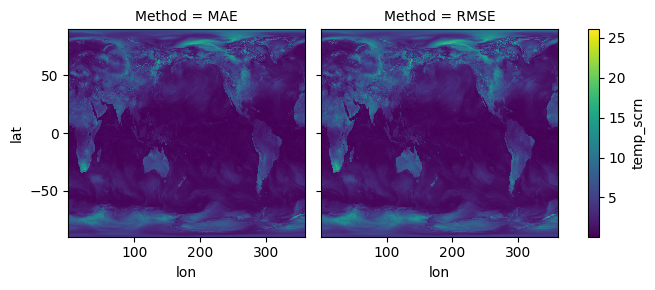

In [6]:
# Figure One - Side by Side Comparison of MAE and RMSE
names = pandas.Index(['MAE', 'RMSE'], name="Method")
xarray.concat([meanAbsoluteDifference, rootMeanSquaredDifference], dim=names).plot(col='Method')

# Some Verification
As with the MAE tutorial, the forecast time step 24*4 - 1 has the same validity as the analysis, both being 00UTC on 24 November 2022.

If you want more information about matching the forecast time step to the observation time step, see the tutorial on Mean Absolute Error.

We show the MAE and the RMSE in the figures below. 

In [7]:
# Extract the forecast of interest, to compare to analysis.temp_scrn
forecast_of_interest = forecast.temp_scrn[24*4-1]

In [8]:
# Calculate the overall MAE, MSE and RMSE
mae_overall = mae(forecast_of_interest, analysis.temp_scrn)
mse_overall = mse(forecast_of_interest, analysis.temp_scrn)
rmse_overall = rmse(forecast_of_interest, analysis.temp_scrn)

In [9]:
# Check that the RMSE is (to within rounding) the square-root of the MSE.
print('MAE: ', mae_overall.values.round(2))
print('MSE: ', mse_overall.values.round(2))
print('RMSE: ', rmse_overall.values.round(2))

MAE:  1.45
MSE:  6.11
RMSE:  2.47


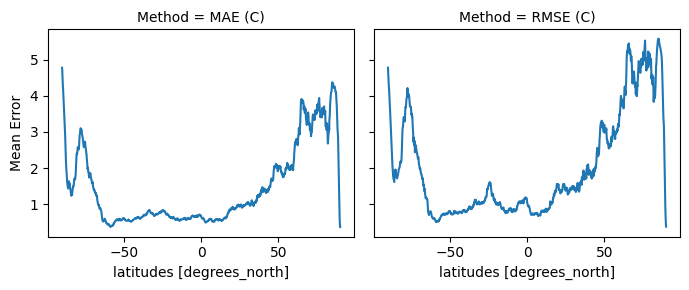

In [10]:
# Figure 2 - MAE and RMSE as a function of latitude
mae_by_latitude = mae(forecast_of_interest, analysis.temp_scrn, reduce_dims='lon')
rmse_by_latitude = rmse(forecast_of_interest, analysis.temp_scrn, reduce_dims='lon')

# Prepare some labelling for the plot
mae_by_latitude.name = "Mean Error"
rmse_by_latitude.name = "Mean Error"
names = pandas.Index(['MAE (C)', 'RMSE (C)'], name="Method")

# Make the plot
xarray.concat([mae_by_latitude, rmse_by_latitude], dim=names).plot(col='Method')

As with the MAE and MSE tutorials, we see the errors increasing towards the poles.

**Things to try next**

Read the help notes for rmse. 

Explore the `weights` option within mse. The tutorial Weighting_Results might assist with this.

Explore the `angular` option within rmse, relevant if forecasting direction in degrees.

Use on real data, making a considered decision as to whether MAE or RMSE is more appropriate based on your definition or use of the forecast.